## Problem set 1 - Adaptive Grids on Hypercomputer with Tasmanian
### Thomas Pellet
#### 07/2019
#### Exercise 1: Analytical Examples

TasmanianSG version: 4.0
TasmanianSG license: BSD 3-Clause


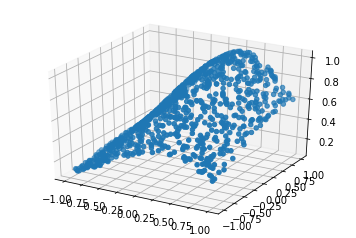

In [14]:
#!/usr/bin/python

# necessary import for every use of TASMANIAN
#
import TasmanianSG
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# imports specifically needed by the examples
import math
from random import uniform
from datetime import datetime

print("TasmanianSG version: {0:s}".format(TasmanianSG.__version__))
print("TasmanianSG license: {0:s}".format(TasmanianSG.__license__))

grid  = TasmanianSG.TasmanianSparseGrid()
grid1 = TasmanianSG.TasmanianSparseGrid()
grid2 = TasmanianSG.TasmanianSparseGrid()

#############################################################################

# EXAMPLE 1 for OSM:
# interpolate: f(x) = cos(2 * pi * w1) + \sum(ci*xi) with x 1000*d matrix
# using piecewise linear basis functions.

#set dimension
d = 2
# define parameter values
w = np.empty([d])  
c = np.empty([d])
c = np.array([1,0.5])
w = np.array([0.3,0.8])

# 1000 d-dimensional sample points 
aPnts = np.empty([1000, d])  
for iI in range(1000):
    for iJ in range(d):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
        aTres[iI] = np.exp(-(c[0]**2*(aPnts[iI,0] - w[0])**2 + c[1]**2*(aPnts[iI,1] - w[1])**2))

#print(aTres)


fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aTres)
plt.show()



-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x) = cos(2 * pi * w1) + \sum(ci*xi)
       using fixed sparse grid with depth 5
       the error is estimated as the maximum from 1000 random points



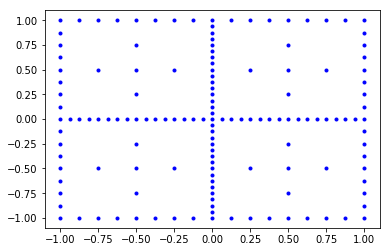

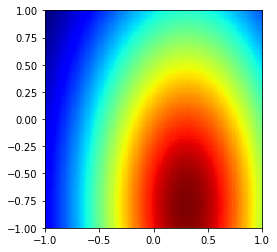

 For localp    Number of points: 145   Max. Error: 2.9094377426563955e-03


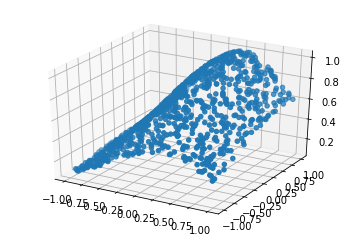

In [29]:

# Sparse Grid with dimension 1 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 5
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x) = cos(2 * pi * w1) + \sum(ci*xi)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp") # Construct sparse grid

grid.plotPoints2D()
aPoints = grid.getPoints()

iNumP1 = aPoints.shape[0]

aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = np.exp(-(c[0]**2*(aPoints[iI,0] - w[0])**2 + c[1]**2*(aPoints[iI,1] - w[1])**2))
grid.loadNeededPoints(aVals) # Define the interpolant based on values and grid

# compute the error

aRes = grid.evaluateBatch(aPnts) # Evaluate the interpolant at the cartesian grid
grid.plotResponse2D()
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aRes)
plt.show()

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()





### Now using adaptative sparse grid

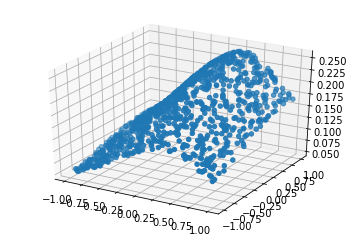

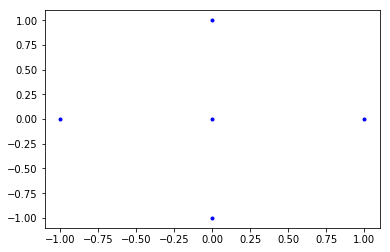

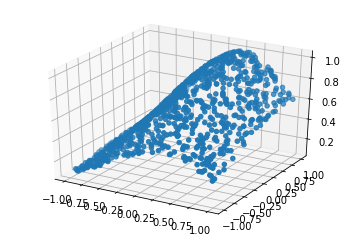


-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   


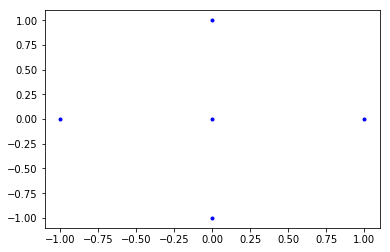

         1        12  4.51e-02


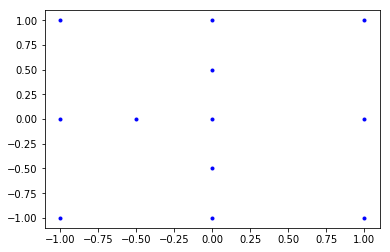

         2        25  1.61e-02


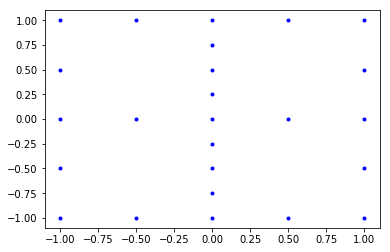

         3        55  5.29e-03


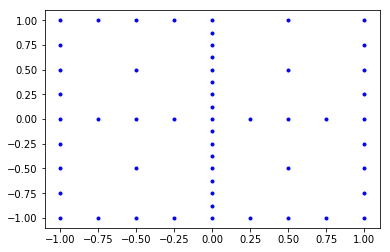

         4       123  1.48e-03


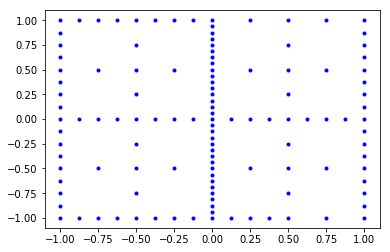

         5       275  4.16e-04


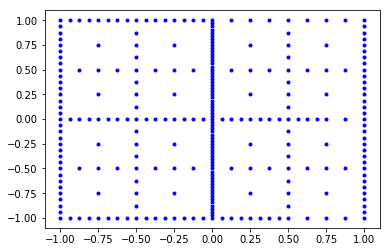

         6       611  1.19e-04


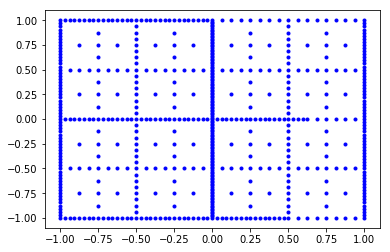

         7      1347  4.11e-05


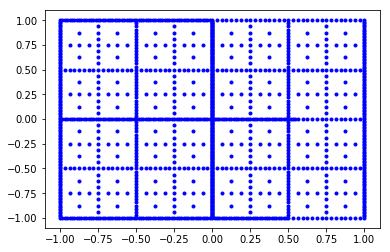

         8      2947  1.14e-05


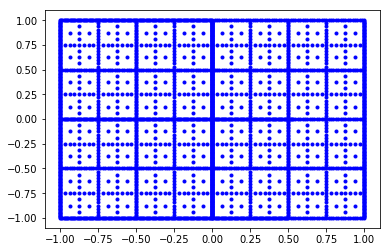

         9      6403  2.80e-06


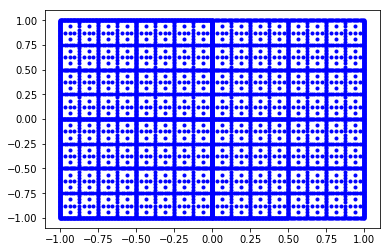

        10     13827  8.11e-07

-------------------------------------------------------------------------------------------------
('   a fix sparse grid of level ', 11, ' would consist of ', 15361, ' points')

-------------------------------------------------------------------------------------------------



In [31]:
#############################################################################

## EXAMPLE 2 for OSE:
## interpolate: f(x,y) = exp(-x) / (1 + 100 * exp(-10 * y))
## using refinement

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = (c[0]**(-2) + (aPnts[iI][0] - w[0])**2)**(-1) * (c[1]**(-2) + (aPnts[iI][1] - w[1])**2)**(-1)
# Plot true function
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aTres)
plt.show()    

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1 # Refinement before doing adaptive computations
fTol = 1.E-5
which_basis = 1 
refinement_level = 10

# level of grid before refinement
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
grid1.plotPoints2D()

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = (c[0]**(-2) + (aPoints[iI][0] - w[0])**2)**(-1) * (c[1]**(-2) + (aPoints[iI][1] - w[1])**2)**(-1)
grid1.loadNeededPoints(aVals)

#evaluate
aRes = grid.evaluateBatch(aPnts) # Evaluate the interpolant at the cartesian grid

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter3D(aPnts[:,0], aPnts[:,1], aRes)
plt.show()   


print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level
for iK in range(refinement_level):
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    grid1.plotPoints2D()
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] =  (c[0]**(-2) + (aPoints[iI][0] - w[0])**2)**(-1) * (c[1]**(-2) + (aPoints[iI][1] - w[1])**2)**(-1)
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    # Plot results with sparse grid
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter3D(aPnts[:,0], aPnts[:,1], aRes)
    plt.show() 
    fError1 = max(np.fabs(aRes[:,0] - aTres))

    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print( "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points")
print("\n-------------------------------------------------------------------------------------------------\n")    



### Exercise 2: Growth model with adaptive grid